Notebook for doing some analysis on the ebike project

In [28]:
import numpy as np
class bike:
    def __init__(self,tireRadius=0.7/2,tireWidth = 0.025, wheelRadius = 0.622/2, mass_wheel_f = 0.66, mass_wheel_r = 0.83, mass_tire_f = 0.24, mass_tire_r = 0.24,mass_frame = 0.8, UCI_max_mass = 6.8, mass_rider = 63, frontalArea = 0.37, CoD = 0.88, density_air = 1.225,gravity=9.81,rollingResistanceCoef = 0.005 ):
        self.tireRadius = tireRadius # UCI limits are 0.55m to 0.7m
        self.tireWidth = tireWidth # UCI maximum is 0.033m
        self.wheelRadius = wheelRadius
        self.mass_wheel_f = mass_wheel_f #kg
        self.mass_wheel_r = mass_wheel_r #kg
        self.mass_tire_f = mass_tire_f#kg
        self.mass_tire_r = mass_tire_r #kg
        self.inertia_f = (self.mass_wheel_f+self.mass_tire_f)*self.wheelRadius**2 #kg*m2
        self.inertia_r = (self.mass_wheel_f+self.mass_tire_f)*self.wheelRadius**2 #kg*m2
        self.mass_frame =mass_frame #kg
        self.UCI_max_mass = UCI_max_mass #kg
        self.mass_UCI_non_rotating = self.UCI_max_mass - (self.mass_wheel_f+self.mass_tire_f + self.mass_wheel_f+self.mass_tire_f)
        self.mass_rider =mass_rider #kg
        self.velocity = 0
        self.mass_bike = self.UCI_max_mass
        self.totalMass = self.mass_rider+self.mass_bike
        self.frontalArea = frontalArea
        self.CoD = CoD
        self.density_air = density_air
        self.gravity = gravity
        self.rollingResistanceCoef = rollingResistanceCoef
    def setVelocity(self,velocity):
        self.velocity = velocity
    def getKineticEnergy(self):
        self.KE = 1/2*self.totalMass*self.velocity**2+1/2*(self.inertia_f+self.inertia_r)*(self.velocity/self.tireRadius)**2
        return self.KE
    def getAeroDragForce(self):
        self.Fd_aero = self.velocity**2*self.density_air*self.CoD*self.frontalArea*0.5
        return self.Fd_aero
    def getRollingDragForce(self):
        self.Fd_rolling = self.rollingResistanceCoef*self.gravity*self.totalMass
        return self.Fd_rolling
    def getDragPower(self):
        self.dragPower = (self.Fd_rolling+self.Fd_aero)*self.velocity
        return self.dragPower

In [29]:
myBike = bike()
print(myBike.getKineticEnergy())
myBike.setVelocity(11)
print(myBike.getKineticEnergy())
print(myBike.getAeroDragForce())
print(myBike.getRollingDragForce())
print(myBike.getDragPower())

0.0
4308.882995102041
24.131030000000003
3.42369
303.10192000000006


In [30]:
atmosphericDensity3point5psiCO2minus40C = 44*0.23/(0.0821*233)
print(atmosphericDensity3point5psiCO2minus40C)

0.5290313811796564


In [31]:
print(0.529/1.225)

0.43183673469387757


In [32]:
#assuming terraformed mars atmosphere and using the current human powered land speed record bicycle
eta = bike(mass_rider = 100,CoD = 0.05,density_air = 0.55,gravity=9.81*0.38,rollingResistanceCoef = 0.0015)
eta.setVelocity(1000/2.25)
print(eta.getKineticEnergy())
print(eta.getAeroDragForce())
print(eta.getRollingDragForce())
print(eta.getDragPower())

10688514.225245653
1004.9382716049384
0.59719356
446904.65118441713


In [33]:
80*24

1920

https://en.wikipedia.org/wiki/Orbital_speed

In [34]:
#orbital velocity at lunar surface
GM_moon = 4.9048695*10**12 # standard gravitational parameter m^3*s^-2
radius_moon = 1738.1*1000 # equatorial radius in meters
orbitalVelocity = math.sqrt(GM_moon/radius_moon)
print('Orbital velocity at the lunar surface is: ',orbitalVelocity,' m/s.')
equatorialCircumferance_moon = radius_moon*2*math.pi
print('Circumferance of the moon at the equator is: ',equatorialCircumferance_moon/1000,' km')

Orbital velocity at the lunar surface is:  1679.872608532767  m/s.
Circumferance of the moon at the equator is:  10920.804382408838  km


In [35]:
100*0.5*(1000/2.25)**2/250/60/60 #time to reach 1000mph on a bicycle on the moon assuming 250 w output and no resistance

10.973936899862826

Battery pack reference: https://chargedevs.com/newswire/gm-reveals-more-technical-details-of-its-ultium-battery-packs/

In [36]:
cellLength = 23*0.0254 #m
cellWidth = 4*0.0254 #m x 
cellHeight = 0.4*0.0254 #m 
cellMass = 3/2.2 #kg
cellCapacity = 0.37 #kWh
cellsPerPack = 10
batteryPackEnergy = cellCapacity*3600*1000*cellsPerPack
additionalMassPerPack = 10
batteryPackMass = cellMass*cellsPerPack+additionalMassPerPack
driveMassPerStage = 15

In [37]:
z = 0.000000007 #sinkage
d = 5 #wheel diameter
Crr = math.sqrt(z/d)
print(Crr)

#https://en.wikipedia.org/wiki/Rolling_resistance
Crr = 0.0643988/(2.2*500*(d*39.37)**0.25)
print(Crr)

3.7416573867739416e-05
1.5629721332262993e-05


An approximate motor option: https://www.amazon.com/Motor-Controller-Electric-Motorbike-Conversion/dp/B077FTP5QM

Speed	4000 RPM

Voltage	72 Volts

Item Weight	8 Kilograms

Rated torque 10 Nm

Peak torque 25 Nm

stage mass: 38.63636363636363
starting mass:  879.7272727272726
final velocity:  1825.2143836868365
total time in hours:  24.712598254874067
wheel speed in rpm:  13943.61078557699
266400000.0
252953367.96203583
0.9495246545121465
distance from average acceleration:  75624.92074017503  km
average v:  813.5605814463388
distance from average v:  72378.70489902644  km
distance from summing average v per stage times time per stage:  68296.3251796341  km
time to charge packs at 250w pedaling:  296.0  hours
number of "orbits" to reach orbital speed:  6.253781570306798
required gear ratio:  [3.02215884 2.09087256 1.6686621  1.41092493 1.23061669 1.09400098
 0.98485938 0.894279   0.81688608 0.74920866 0.6888769  0.63419628
 0.58390289 0.53701361 0.49272803 0.45035828 0.4092717  0.3688338
 0.32833506 0.28686974]
min motor speed rpm:  [   0.         2767.38937389 3192.27891835 3382.17049204 3488.82258583
 3555.94388827 3600.94514323 3632.1083811  3653.83098167 3668.60781076
 3677.89073842 3682.49

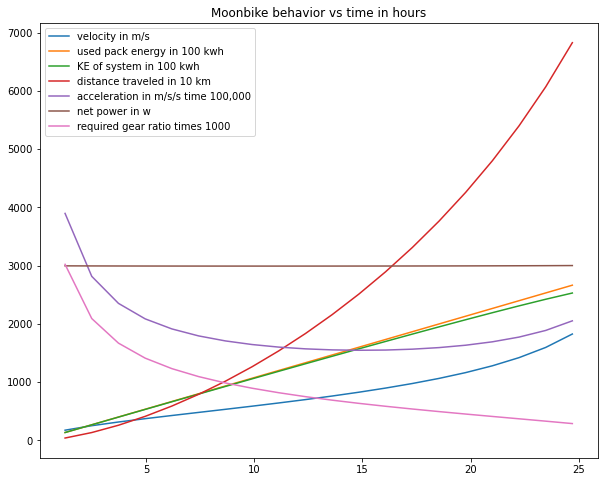

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt
moonBike = bike(tireRadius=2.5/2,tireWidth = 0.025, wheelRadius = 2.45/2, mass_wheel_f = 3, mass_wheel_r = 4)
numStages = 20
lunarGravity = 1.62 #m/s/s
v = 0
stageMass = batteryPackMass + driveMassPerStage
print('stage mass:', stageMass)
riderMass = 100
time = 0
maxPower = 3000 #watts
usedPackEnergy = 0
KE = 0
inputMotorSpeed = 4000/60
inputMotorRatedTorque = 15 #Nm
v_rec = np.zeros(numStages)
time_rec = np.zeros(numStages)
usedPackEnergy_rec = np.zeros(numStages)
KE_rec = np.zeros(numStages)
approximateDistance = np.zeros(numStages)
approximateAcceleration = np.zeros(numStages)
normalForcePerAxle = np.zeros(numStages)
rollingResistancePower = np.zeros(numStages)
netPower = np.zeros(numStages)
wheelSpeedHz = np.zeros(numStages)
minMotorSpeedPerStage = np.zeros(numStages)
maxMotorSpeedPerStage = np.zeros(numStages)
torqueLimited = np.zeros(numStages)
distance = 0
requiredGearRatio = np.zeros(numStages)
torqueToReachApproximateAcceleration = np.zeros(numStages)
for i in range(numStages):
    mass = riderMass+stageMass*(numStages-i)+moonBike.mass_wheel_f+moonBike.mass_wheel_r
    v = math.sqrt((batteryPackEnergy+KE)*2/(mass+(moonBike.inertia_f+moonBike.inertia_r)/moonBike.tireRadius))
    KE = 1/2*mass*v**2+1/2*(moonBike.inertia_f+moonBike.inertia_r)*(v/moonBike.tireRadius)**2
    usedPackEnergy +=batteryPackEnergy
    normalForcePerAxle[i] = mass/2*(lunarGravity-v**2/radius_moon)
    rollingResistancePower[i] = Crr*normalForcePerAxle[i]*2*v
    netPower[i] = (maxPower-rollingResistancePower[i])
    timeStage = batteryPackEnergy/(netPower[i])
    time += timeStage
    wheelSpeedHz[i] = (v/(2*math.pi*moonBike.tireRadius))
    requiredGearRatio[i] =inputMotorSpeed/wheelSpeedHz[i]

    maxMotorSpeedPerStage[i] = (v/(2*math.pi*moonBike.tireRadius))*requiredGearRatio[i]
    dV = v-v_rec[i]
    if i>0:
        dD = (v_rec[i-1]+v)/2*timeStage #average speed for stage times stage time
        minMotorSpeedPerStage[i] = (v_rec[i-1]/(2*math.pi*moonBike.tireRadius))*requiredGearRatio[i]
    else:
        dD = (v)/2*timeStage #average speed for stage times stage time
    distance += dD
    
    approximateDistance[i] = distance
    approximateAcceleration[i] = dV/time
    v_rec[i] = v
    time_rec[i] = time
    usedPackEnergy_rec[i] = usedPackEnergy
    KE_rec[i] = KE
    torqueToReachApproximateAcceleration[i] = approximateAcceleration[i]*mass*moonBike.tireRadius/requiredGearRatio[i]
    torqueLimited[i] = torqueToReachApproximateAcceleration[i] > inputMotorRatedTorque

print('starting mass: ', stageMass*numStages+riderMass+moonBike.mass_wheel_f+moonBike.mass_wheel_r)
print('final velocity: ',v)
print('total time in hours: ', time/3600)
print('wheel speed in rpm: ',max(wheelSpeedHz)*60)
totalPackEnergy = numStages*batteryPackEnergy
finalKE = 1/2*mass*v**2+1/2*(moonBike.inertia_f+moonBike.inertia_r)*(v/moonBike.tireRadius)**2
print(totalPackEnergy)
print(finalKE)
print(finalKE/totalPackEnergy)
plt.title('Moonbike behavior vs time in hours')
plt.plot(time_rec/3600,v_rec,label='velocity in m/s')
plt.plot(time_rec/3600,usedPackEnergy_rec/100000,label='used pack energy in 100 kwh')
plt.plot(time_rec/3600, KE_rec/100000,label='KE of system in 100 kwh')
plt.plot(time_rec/3600,approximateDistance/1000/10,label='distance traveled in 10 km')
plt.plot(time_rec/3600,approximateAcceleration*100000,label='acceleration in m/s/s time 100,000')
plt.plot(time_rec/3600,netPower,label='net power in w')
plt.plot(time_rec/3600,requiredGearRatio*1000,label='required gear ratio times 1000')
plt.legend()
plt.rcParams['figure.figsize'] = [10, 8]
print('distance from average acceleration: ',(1/2*np.average(approximateAcceleration)*time**2)/1000, ' km')
print('average v: ', np.average(v_rec))
print('distance from average v: ',np.average(v_rec)*time/1000,' km' )
print('distance from summing average v per stage times time per stage: ', max(approximateDistance/1000),' km')
print('time to charge packs at 250w pedaling: ',usedPackEnergy/250/3600,' hours')
print('number of "orbits" to reach orbital speed: ',max(approximateDistance)/equatorialCircumferance_moon)
print('required gear ratio: ', requiredGearRatio)
print('min motor speed rpm: ', minMotorSpeedPerStage*60)
print('max motor speed rpm: ', maxMotorSpeedPerStage*60)
print('required torque Nm: ', torqueToReachApproximateAcceleration)
print('torque limited in this stage: ', torqueLimited)



In [57]:
ForceRR = (3.9*10**-5)*1.6*200

In [58]:
ForceRR*1700

21.216

In [59]:
180/12

15.0

For deceleration, assume we use the final stage as a generator and just use resistive heating of a thermal radiator. Stefan boltzmann law: https://courses.lumenlearning.com/physics/chapter/14-7-radiation/#:~:text=The%20rate%20of%20heat%20transfer%20by%20emitted%20radiation%20is%20determined,its%20absolute%20temperature%20in%20kelvin.

In [60]:
sigma = 5.67*10**-8
emissivity = 0.9
area = 1
temperature = 400
radiatedPower = sigma*emissivity*area*temperature**4
print(radiatedPower)
power = 3000
requiredTemperatureK = (power/sigma/emissivity/area)**0.25
print('The required temperature of the designed radiator to emit at the required power level is: ',requiredTemperatureK,' K')

1306.368
The required temperature of the designed radiator to emit at the required power level is:  492.40666372870703  K


In [62]:
#assuming we want to reach escape velocity of 2400 m/s by riding in a big bowl,
# how big does the radius of the bowl need to be to avoid getting squished under acceleration
escapeV = 2400
limitAcceleration = 9.81*2 #assume 5 earth g is the limit
radius = escapeV**2/limitAcceleration
print('The required radius is : ',radius,' meters, or ',radius/radius_moon*100,'% the radius of the moon.')

The required radius is :  293577.9816513761  meters, or  16.890741709416957 % the radius of the moon.


Text(0, 0.5, 'track radius (km)')

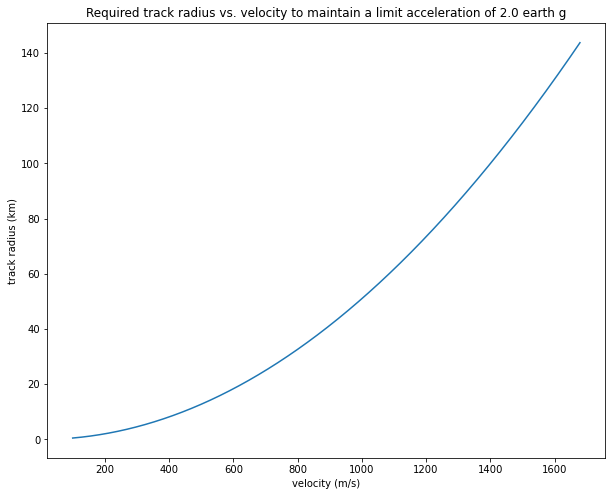

In [75]:
velocity = np.arange(100,1680)
radius = np.power(velocity,2)/limitAcceleration
plt.figure()
plt.plot(velocity,radius/1000,label='radius (km) ')
title = 'Required track radius vs. velocity to maintain a limit acceleration of '+ str(limitAcceleration/9.81) +' earth g'
plt.title(title)
plt.xlabel('velocity (m/s)')
plt.ylabel('track radius (km)')

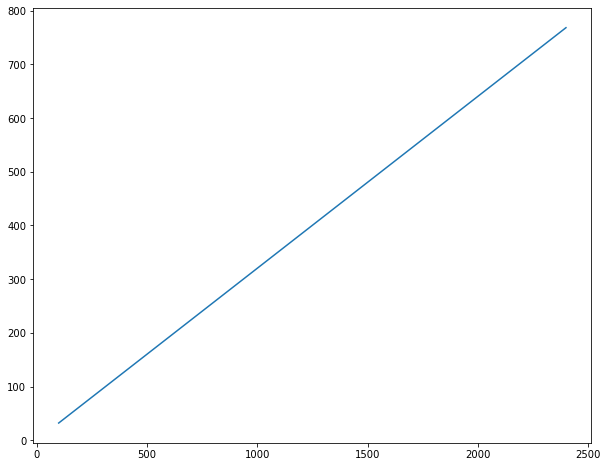

In [70]:
circumference = radius*2*math.pi
timeToCircle = np.divide(circumference,velocity)
plt.figure()
plt.plot(velocity,timeToCircle)

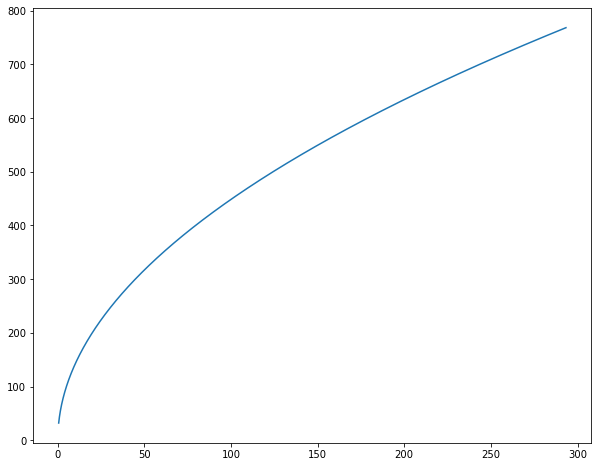

In [72]:
plt.figure()
plt.plot(radius/1000,timeToCircle)